<a href="https://colab.research.google.com/github/leptoquark/data-analysis/blob/main/data_analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open('data-analysis')

sheet_titles = []
for sheet in workbook.worksheets():
  sheet_titles.append(sheet.title)
sheet_titles

dict_of_sheets = {}
for sheet_title in sheet_titles:
  sheet = workbook.worksheet(sheet_title)
  values = sheet.get_all_values()
  dict_of_sheets[sheet_title] = values
# To confirm all sheets made it into the dictionary
dict_of_sheets.keys()

import pandas as pd

df = pd.DataFrame.from_records(dict_of_sheets.get('Foglio1'))

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [ ]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')


pd.set_option('display.max_columns', None)

df.head()


,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,########,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,########,########,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,########,########,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,########,########,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0


In [ ]:
df.describe(include='all')

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia
count,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787.000000,787.000000,787.000000,787.000000,787.0,787.000000,787.000000,787.000000,787.000000,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787
unique,3,786,3,2,4,4,3,3,6,6,3,3,5,2,124,162,133,32,13,6,1,1,661,1,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,64,2,8,1,69,6,27,1,1,5,2,2,2,83,5,4,3,7,19
top,Cliente 5,8709453,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PALERMO (PA),90135,PALERMO,PA,SICILIA,,########,########,455,,,,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,0,0,0,0,0,Utente 470,########,########,Esattore INTERNO,TRUE,FALSE,,,0,0,0,0,0
freq,561,2,569,571,569,569,578,578,570,570,756,470,756,756,229,46,264,264,593,777,787,787,7,787,786,786,722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787,651,786,777,787,652,644,261,787,787,303,569,707,651,486,616,784,763,614,542
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5002.607433,5017.640191,1915.078983,142.328653,0.0,-2.024651,7075.047827,5002.607433,5118.559657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7210.546421,7200.835978,3791.542452,652.417407,0.0,14.739610,10088.761611,7210.546421,7132.024856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-106.620000,0.000000,-200.000000,0.0,-133.250000,-106.620000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.000000,250.000000,0.000000,0.000000,0.0,0.000000,281.250000,225.000000,560.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.890000,1969.890000,504.700000,0.000000,0.0,0.000000,2713.880000,1969.890000,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6576.790000,6576.790000,1926.510000,38.060000,0.0,0.000000,9397.795000,6576.790000,6868.705000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


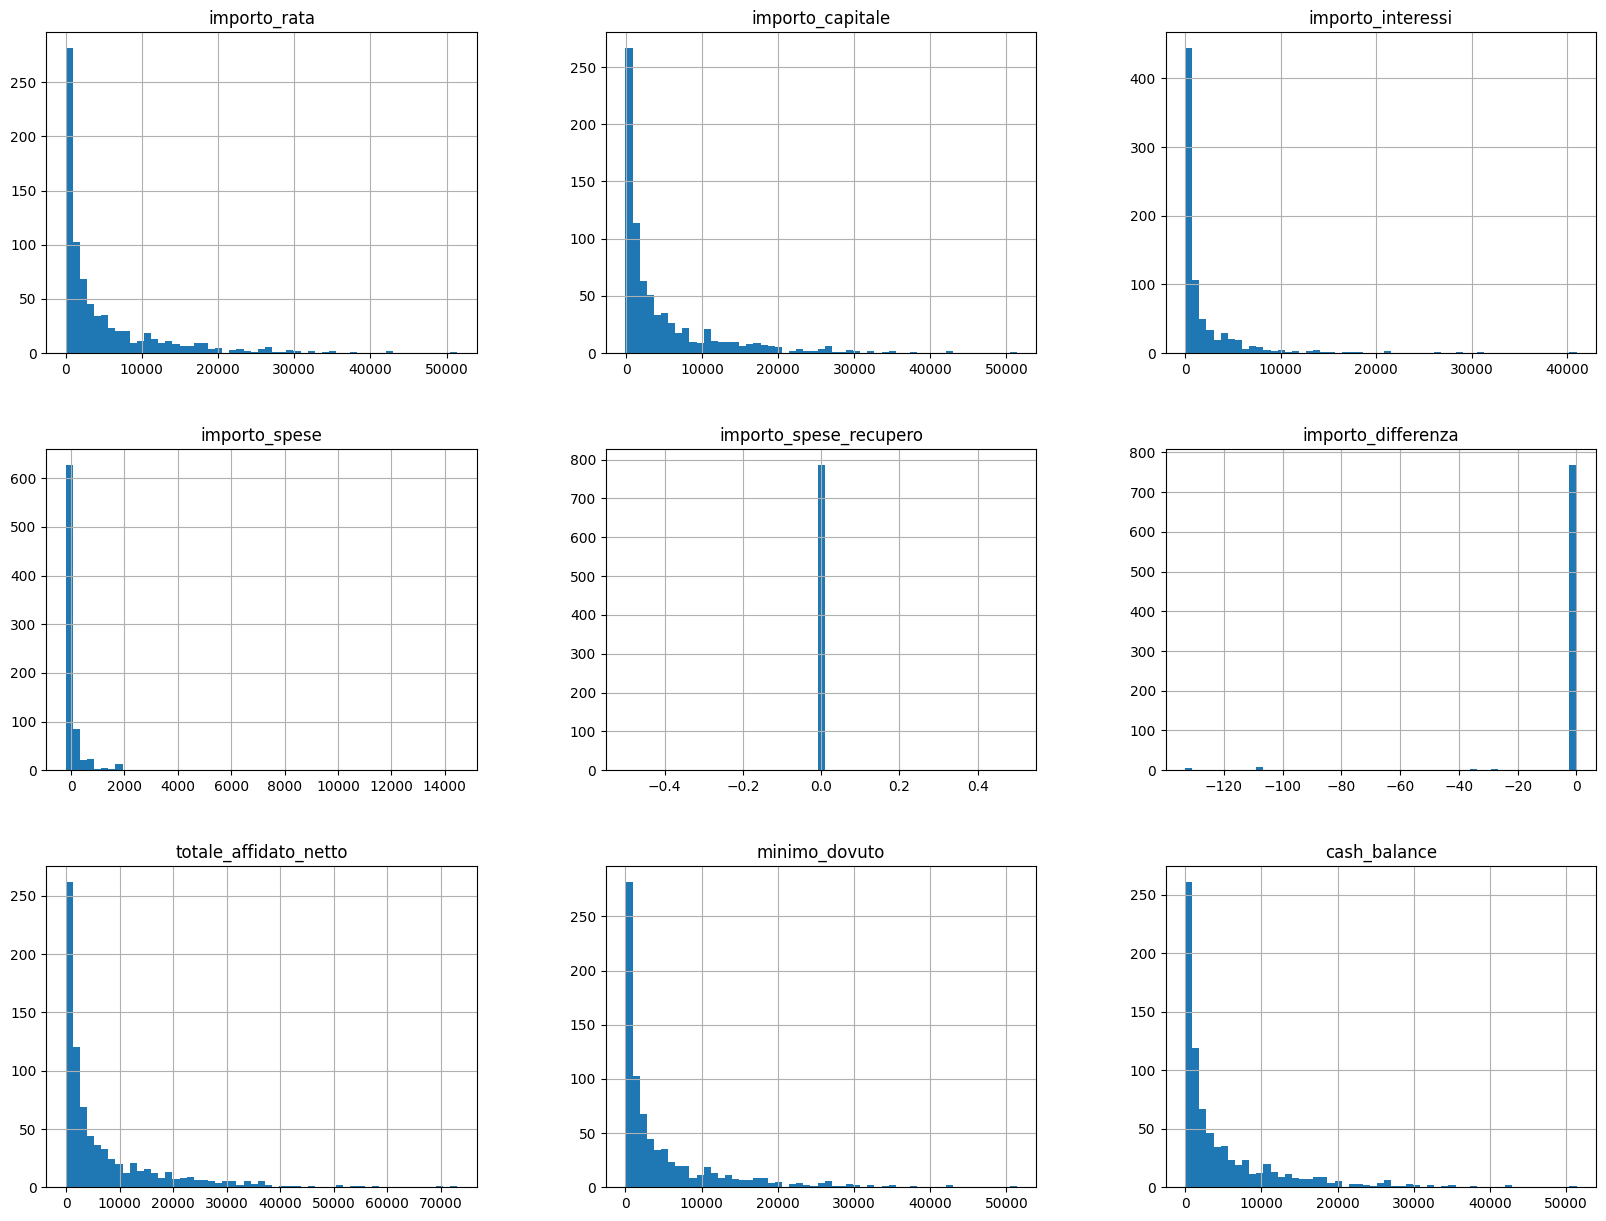

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.hist(bins=55, figsize=(20,15))
plt.show();

In [ ]:
X=df[['cash_balance']]

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=20,
                       encode='ordinal',
                       strategy='uniform',
                       subsample=None)
est.fit(X)
Xt = est.transform(X)

learn = df.drop(columns='cash_balance')
df['cash_balance_bin'] = Xt

df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,########,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,########,########,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,########,########,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0,1.0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,########,########,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,FALSE,FALSE,,########,0,0,0,0,0,2.0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,########,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,########,########,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,,0,0,0,0,0,0,Utente 468,########,########,Esattore ESTERNO,TRUE,FALSE,,########,0,0,0,0,0,2.0


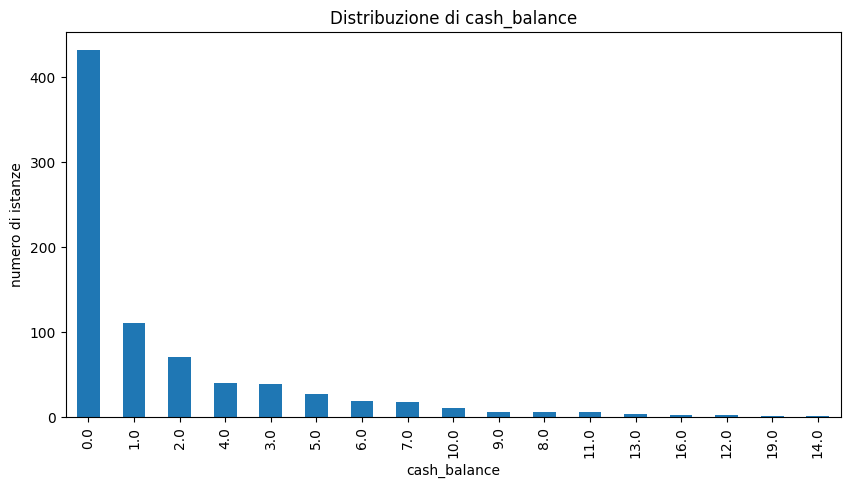

In [ ]:
df.cash_balance_bin.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuzione di cash_balance")
plt.ylabel('numero di istanze')
plt.xlabel('cash_balance');

(787, 8)
[0.25022401 0.25797357 0.05999488 0.01863649 0.         0.00446473
 0.1581118  0.25059452]


Text(0.5, 1.0, 'Selezione delle caratteristiche numeriche più importanti')

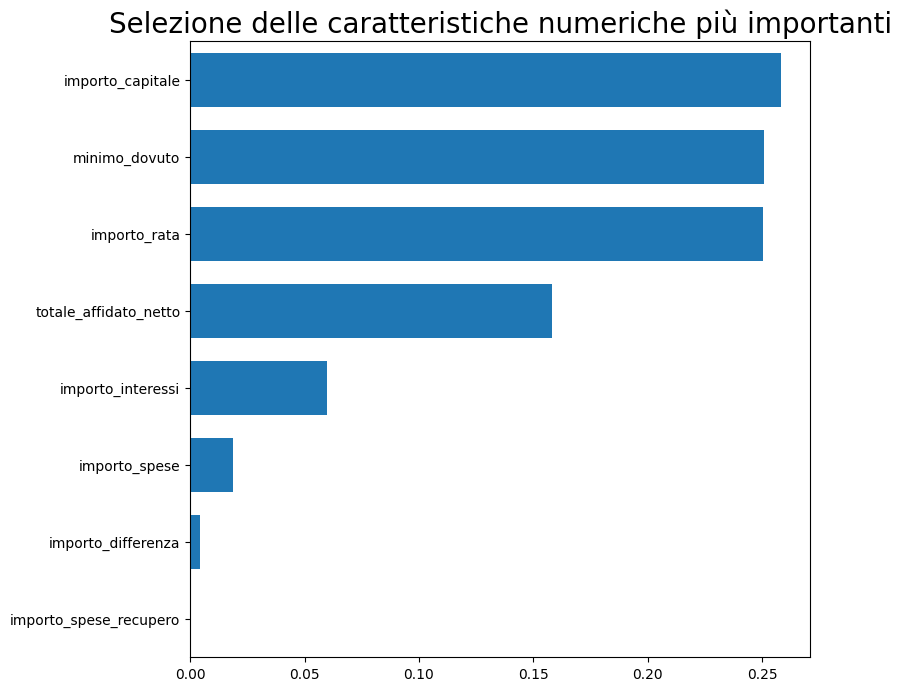

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

X,y=df[[
        'importo_rata',
        'importo_capitale',
        'importo_interessi',
        'importo_spese',
        'importo_spese_recupero',
        'importo_differenza',
        'totale_affidato_netto',
        'minimo_dovuto',
        ]],df.cash_balance_bin
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X,y)
print(clf.feature_importances_)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0,len(clf.feature_importances_))+0.5
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height = 0.7)
ax1.set_yticks(tree_indices)

ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])

ax1.set_ylim((0,len(clf.feature_importances_)))
ax1.set_title("Selezione delle caratteristiche numeriche più importanti", fontsize=20)


<ipython-input-17-7697ca64d774>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,cash_balance_bin
0,,,,,,,,,,
importo_rata,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,0.980533
importo_capitale,0.999860,1.000000,0.590445,0.167502,NaN,0.091037,0.946480,0.999860,0.985832,0.981673
importo_interessi,0.590589,0.590445,1.000000,0.265765,NaN,0.067806,0.814434,0.590589,0.586441,0.577150
importo_spese,0.167467,0.167502,0.265765,1.000000,NaN,0.025850,0.284101,0.167467,0.166120,0.165363
importo_spese_recupero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importo_differenza,0.092868,0.091037,0.067806,0.025850,NaN,1.000000,0.092132,0.092868,0.083381,0.072920
totale_affidato_netto,0.946432,0.946480,0.814434,0.284101,NaN,0.092132,1.000000,0.946432,0.934774,0.928265
minimo_dovuto,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,0.980533
cash_balance,0.984654,0.985832,0.586441,0.166120,NaN,0.083381,0.934774,0.984654,1.000000,0.994844


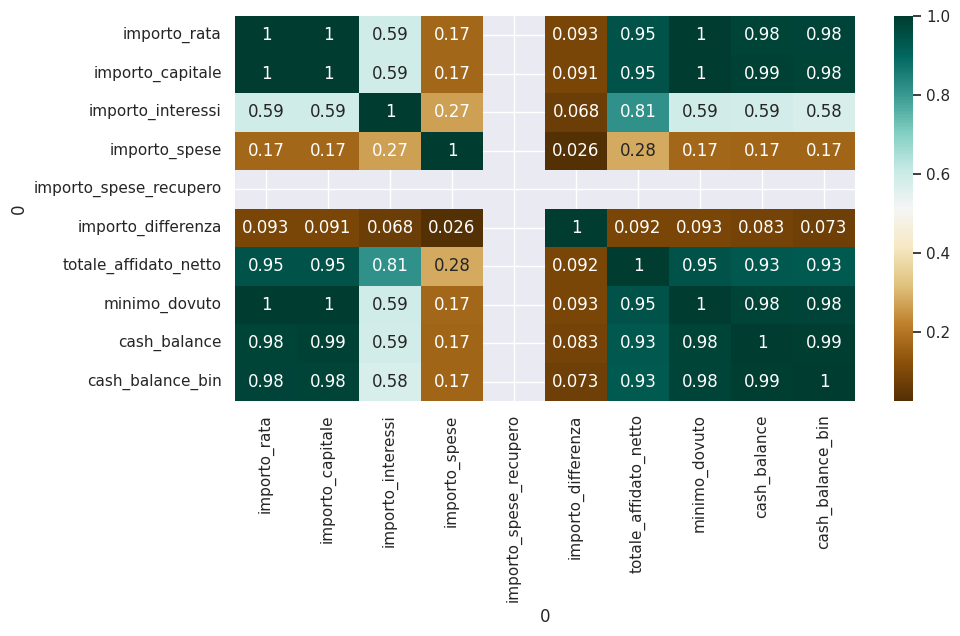

In [ ]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

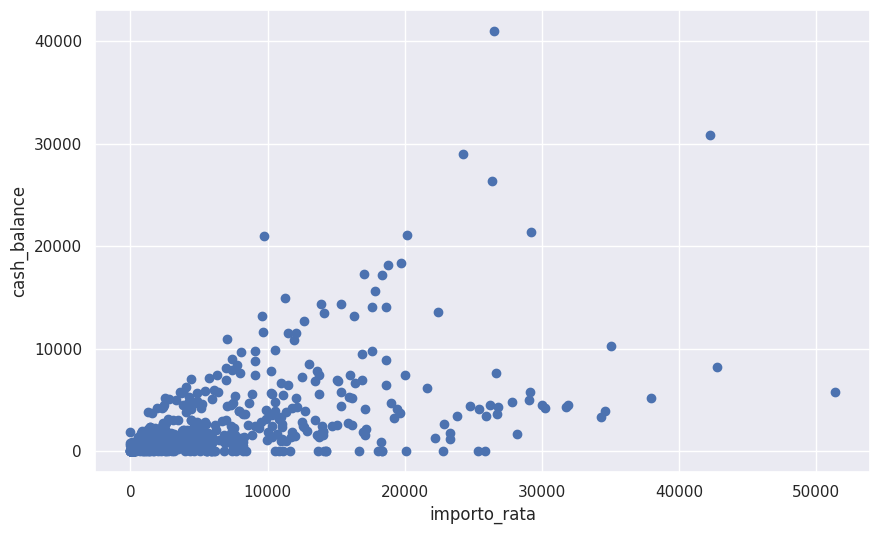

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['importo_rata'], df['importo_interessi'])
ax.set_xlabel('importo_rata')
ax.set_ylabel('cash_balance')
plt.show()